Here we harness the power of neural networks to be able to read a bloc of text and ascertain the quality of the film. To that end, we tokenized and lemmatized our text and then used an LSTM Neural Network to determine whether the overall tone of the film was positive or not. The utility of a program like this can be applied to sentiment analysis for things like twitter or other platforms and it becomes really easy to get a snapshot about what an audience or consumer finds to be good and what they find to be bad.  

# IMPORTING THE NECESSARY INFORMATION

In [209]:
import pandas as pd
import numpy as np
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

df1= pd.read_pickle("./data/all_data_pkl.pickle")
df1.head()

,filename,rating,review
0,0_9.txt,1,Bromwell High is a cartoon comedy. It ran at t...
1,10000_8.txt,1,Homelessness (or Houselessness as George Carli...
2,10001_10.txt,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,10002_7.txt,1,This is easily the most underrated film inn th...
4,10003_8.txt,1,This is not the typical Mel Brooks film. It wa...


In [210]:
df2 = pd.read_pickle(path='./data/test_data_pkl.pickle')
df2.head()

,filename,rating,review
0,0_10.txt,1,I went and saw this movie last night after bei...
1,10000_7.txt,1,Actor turned director Bill Paxton follows up h...
2,10001_9.txt,1,As a recreational golfer with some knowledge o...
3,10002_8.txt,1,"I saw this film in a sneak preview, and it is ..."
4,10003_8.txt,1,Bill Paxton has taken the true story of the 19...


In [211]:
import pandas as pd
import numpy as np
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import matplotlib

df1= pd.read_pickle("./data/all_data_pkl.pickle")
df1.head()

,filename,rating,review
0,0_9.txt,1,Bromwell High is a cartoon comedy. It ran at t...
1,10000_8.txt,1,Homelessness (or Houselessness as George Carli...
2,10001_10.txt,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,10002_7.txt,1,This is easily the most underrated film inn th...
4,10003_8.txt,1,This is not the typical Mel Brooks film. It wa...


# Cleaning the Data

The first thing we're going to do is load in the dataset and combine it and our next step is to clean the data. 


In [212]:
import string
import re
exclude = set(string.punctuation)

The below function works to remove line breaks and as well as the other punctuation in the text

In [213]:
df_list=[]
for i in df['review']:
    for string in i:
        i = i.strip('<br>')
        i = i.strip('<br />')
        i = i.strip().strip('\n').strip('\t')
    i = ''.join(ch for ch in i if ch not in exclude)
    i = i.lower()
    i = re.split(r'\W+', i)
    df_list.append(i)
# df_list

In [214]:
# df_list

In [215]:
len(df_list)

50000

In [8]:
# df_list[0]

The Slides below get single instances of all the words in the file and puts them all onto a list. 

In [9]:
Cleaned_rev_test = []
for j in df_list:
    for i in j:
        if i not in Cleaned_rev_test:
            Cleaned_rev_test.append(i)

In [10]:
len(Cleaned_rev_test)

180449

In [11]:
# Cleaned_rev_test

Below we create a list for the film's ratings. 

In [12]:
rat = []
for i in df['rating']:
    rat.append(i)

In [13]:
len(df_list)

50000

In [14]:
final_df = pd.DataFrame(
{'review' : df_list,
 'rating' : rat
})

In [15]:
final_df.head()

,review,rating
0,"[bromwell, high, is, a, cartoon, comedy, it, r...",1
1,"[homelessness, or, houselessness, as, george, ...",1
2,"[brilliant, overacting, by, lesley, ann, warre...",1
3,"[this, is, easily, the, most, underrated, film...",1
4,"[this, is, not, the, typical, mel, brooks, fil...",1


In [16]:
final_df=final_df.reset_index()

In [19]:
# final_df['review'][49999]

In [34]:


stop_words = set(stopwords.words('english'))

# Creating a Visualization

In [35]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
vocab = {}
for i in final_df['review']:
    for j in i: 
        if j not in vocab: 
            vocab[j]=1
        else:
            vocab[j]+1

Here, we make a list that we can use to count all the terms within the entire dataset and then we can use counter to measure the most common words. 

In [36]:
list = []
for i in final_df.review:
    for j in i:
        list.append(j)

In [37]:
vocab = Counter(list)

In [38]:
vocab.most_common(20)

[('the', 663876),
 ('and', 320725),
 ('a', 320555),
 ('of', 288384),
 ('to', 266781),
 ('is', 210176),
 ('in', 184877),
 ('it', 153048),
 ('i', 152189),
 ('this', 149418),
 ('that', 136130),
 ('br', 112429),
 ('was', 95228),
 ('as', 91239),
 ('with', 86852),
 ('for', 86730),
 ('movie', 83541),
 ('but', 81788),
 ('film', 74486),
 ('on', 66669)]

Well, this isn't really a helpful arrangement as it's mostly getting the filler words in the dataset. 

In [39]:
vocab = Counter(list)

In [40]:
common = vocab.most_common(50)

In [41]:
len(vocab)

180449

In [42]:
common[0]

('the', 663876)

In [43]:
common[0][0]

'the'

In [44]:
word_list = []
qty_list = []
for i in range(0, len(common)):
    word_list.append(common[i][0])
    qty_list.append(common[i][1])
# word_list

In [45]:
# qty_list

Text(0.5, 1.0, 'Most Common Words')

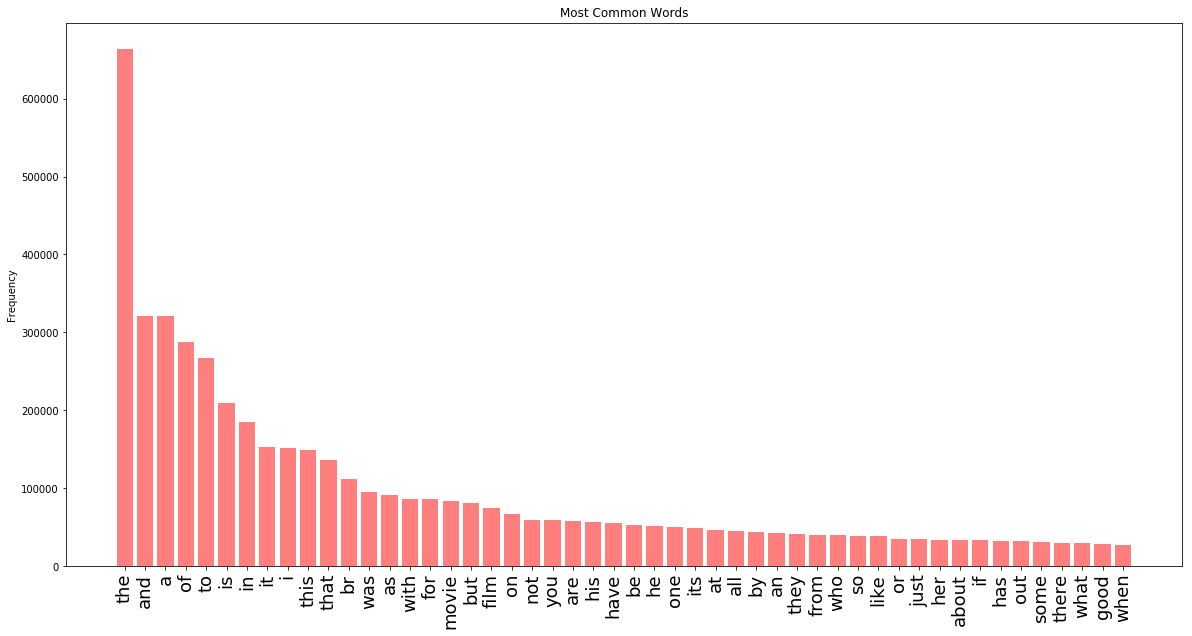

In [49]:
y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Frequency')
plt.title('Most Common Words')

Plotting it out also provides little context and value as it's mostly relating to different stop words in the set. 

In [50]:
len(vocab)

180449

In [51]:
min_occurance = 5
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

45561


In [52]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [53]:
save_list(tokens, 'tokens.txt')

In [54]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
# load vocabulary
vocab_filename = 'data/vocabulary.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

We're saving and loading our documents here for later use. 

In [55]:
# tokens

Now that we have our dataset cleaned and have done some basic exploration, we can start on teh modeling. 

# Developing our Model 

In [56]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [57]:
target = final_df.rating

In [58]:
y = pd.get_dummies(target).values

In [59]:
review = final_df.review

In [60]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts((review))
list_tokenized_headlines = tokenizer.texts_to_sequences(review)
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [61]:
embedding_size = 128
input_ = Input(shape=(100,))
x = Embedding(20000, embedding_size)(input_)
x = LSTM(25, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
# There are 2 different possible classes, so we use 2 neurons in our output layer
x = Dense(2, activation='softmax')(x)

model = Model(inputs=input_, outputs=x)

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 25)           15400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

Now that we have a model, we can try to fit in and see how well our model performs. 

In [64]:
model.fit(X_t, y, epochs=2, batch_size=32, validation_split=0.5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 58s 2ms/step - loss: 0.4890 - acc: 0.7551 - val_loss: 0.3599 - val_acc: 0.8375
Epoch 2/2
25000/25000 [==============================] - 55s 2ms/step - loss: 0.2862 - acc: 0.8893 - val_loss: 0.3876 - val_acc: 0.8387


It appears that running it for two epochs has a 90% accuracy. Not bad, not bad at all. But, let's see what happens when we run more. 

In [65]:
model.fit(X_t, y, epochs=10, batch_size=32, validation_split=0.5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 55s 2ms/step - loss: 0.1904 - acc: 0.9285 - val_loss: 0.4632 - val_acc: 0.8256
Epoch 2/10
25000/25000 [==============================] - 56s 2ms/step - loss: 0.1257 - acc: 0.9560 - val_loss: 0.4986 - val_acc: 0.8171
Epoch 3/10
25000/25000 [==============================] - 57s 2ms/step - loss: 0.0897 - acc: 0.9697 - val_loss: 0.7001 - val_acc: 0.8117
Epoch 4/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0621 - acc: 0.9792 - val_loss: 0.8157 - val_acc: 0.8165
Epoch 5/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.8969 - val_acc: 0.8077
Epoch 6/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0371 - acc: 0.9884 - val_loss: 1.0119 - val_acc: 0.8020
Epoch 7/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0326 - acc: 0.9895 - val_loss: 0.9639 - val_acc

In [66]:
model.fit(X_t, y, epochs=20, batch_size=32, validation_split=0.5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0193 - acc: 0.9940 - val_loss: 1.1798 - val_acc: 0.8060
Epoch 2/20
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0143 - acc: 0.9960 - val_loss: 1.2847 - val_acc: 0.8058
Epoch 3/20
25000/25000 [==============================] - 59s 2ms/step - loss: 0.0227 - acc: 0.9932 - val_loss: 1.4177 - val_acc: 0.8004
Epoch 4/20
25000/25000 [==============================] - 61s 2ms/step - loss: 0.0119 - acc: 0.9962 - val_loss: 1.5911 - val_acc: 0.7956
Epoch 5/20
25000/25000 [==============================] - 61s 2ms/step - loss: 0.0107 - acc: 0.9969 - val_loss: 1.6615 - val_acc: 0.8016
Epoch 6/20
25000/25000 [==============================] - 62s 2ms/step - loss: 0.0137 - acc: 0.9961 - val_loss: 1.6057 - val_acc: 0.7977
Epoch 7/20
25000/25000 [==============================] - 61s 2ms/step - loss: 0.0114 - acc: 0.9968 - val_loss: 1.4423 - val_acc

Validation accuracy appears to decrease in both instances. 

Well, that's not terribly helpful, let's try to run a gridsearch to see if we can optimize for acccuracy. 

# Running a Grid Search

In [67]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, GlobalMaxPool1D, Embedding, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [68]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import cross_val_score

In [ ]:
model = Model(inputs=input_, outputs=x)

In [69]:
def create_model():
    model2 = Sequential()
    model2.add(Embedding(20000, 128))
    model2.add(LSTM(25, return_sequences=True))
    model2.add(GlobalMaxPool1D())
    model2.add(Dropout(.5))
    model2.add(Dense(50, activation='relu'))
    model2.add(Dropout(.5))
    model2.add(Dense(20, activation='softmax'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [70]:
model2 = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [32,64,128,256]
epochs = [1,2,3,4,5]

In [71]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_t, y)

C:\Users\xxtur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\xxtur\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [72]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969800 using {'batch_size': 256, 'epochs': 1}
0.880640 (0.067602) with: {'batch_size': 32, 'epochs': 1}
0.860160 (0.072476) with: {'batch_size': 32, 'epochs': 2}
0.857300 (0.097875) with: {'batch_size': 32, 'epochs': 3}
0.859040 (0.063714) with: {'batch_size': 32, 'epochs': 4}
0.846300 (0.078907) with: {'batch_size': 32, 'epochs': 5}
0.916120 (0.048999) with: {'batch_size': 64, 'epochs': 1}
0.889840 (0.095213) with: {'batch_size': 64, 'epochs': 2}
0.873420 (0.115763) with: {'batch_size': 64, 'epochs': 3}
0.868900 (0.094590) with: {'batch_size': 64, 'epochs': 4}
0.914900 (0.035005) with: {'batch_size': 64, 'epochs': 5}
0.927480 (0.041306) with: {'batch_size': 128, 'epochs': 1}
0.928940 (0.042277) with: {'batch_size': 128, 'epochs': 2}
0.886460 (0.063648) with: {'batch_size': 128, 'epochs': 3}
0.924380 (0.046437) with: {'batch_size': 128, 'epochs': 4}
0.851440 (0.090744) with: {'batch_size': 128, 'epochs': 5}
0.969800 (0.016685) with: {'batch_size': 256, 'epochs': 1}
0.872940 (0.

Our results suggest that the ideal batch size is 256, and the best number of epochs for this is 5. Now we can make our model again with these parameters in mind and see hour our model performs

# Developing our Final Model

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t,y, test_size=.25)        

In [102]:
def create_model():
    model2 = Sequential()
    model2.add(Embedding(20000, 128))
    model2.add(LSTM(25, return_sequences=True))
    model2.add(GlobalMaxPool1D())
    model2.add(Dropout(.5))
    model2.add(Dense(50, activation='relu'))
    model2.add(Dropout(.5))
    model2.add(Dense(20, activation='softmax'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model2=create_model()
model2.fit(X_t, y, epochs=5, batch_size=256, validation_split=0.5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 571us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.8511 - val_acc: 0.8715
Epoch 2/5
25000/25000 [==============================] - 14s 576us/step - loss: 8.2281e-04 - acc: 0.9999 - val_loss: 0.9094 - val_acc: 0.8702
Epoch 3/5
25000/25000 [==============================] - 14s 570us/step - loss: 9.5445e-04 - acc: 0.9998 - val_loss: 0.9187 - val_acc: 0.8706
Epoch 4/5
25000/25000 [==============================] - 15s 586us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.9254 - val_acc: 0.8704
Epoch 5/5
25000/25000 [==============================] - 16s 630us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.9798 - val_acc: 0.8687


Well, hey, this is a pretty decent performance on the model. 87% accuracy is a pretty good state to be in on the training set.
Validation accuracy continues to decrease slightly, and thatt might be indicating that some overfitting is going on so upon later reviews, let's see our performance in the test set to assess the correctness of our assumption. 

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [106]:
preds = model2.predict(X_test)

In [121]:
pred = []
for i in preds:
#     print(i)
    if i[0] < .5:
        i=0
        pred.append(i)
    else:
        i=1
        pred.append(i)

In [122]:
y_test_res = []
for i in y_test:
    y_test_res.append(i[0])

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [119]:
pred = np.asarray(pred, dtype=np.float32)

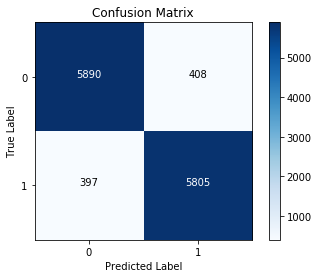

In [123]:
show_cf(y_test_res, pred)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test_res,pred)

0.9356

In [129]:
print(classification_report(pred, y_test_res))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6287
           1       0.94      0.93      0.94      6213

   micro avg       0.94      0.94      0.94     12500
   macro avg       0.94      0.94      0.94     12500
weighted avg       0.94      0.94      0.94     12500



Now, let's do a little more exploration and understanding of our data. 

# Creating Some Visualizations

In [130]:
stop_words = set(stopwords.words('english'))

We can now drop our stopwords and then see how things improve. 

In [131]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
vocab = {}
for i in final_df['review']:
    for j in i: 
        if j not in vocab: 
            vocab[j]=1
        else:
            vocab[j]+1

In [132]:
list = []
for i in final_df.review:
    for j in i:
        list.append(j)

In [133]:
list = [w for w in list if not w in stop_words]
# filter out short tokens
list = [word for word in list if len(word) > 2]


The line of code above gets rid of all words that are shorter than 3 letters and removes all stopwords from the dataset

In [134]:
vocab = Counter(list)

In [135]:
common = vocab.most_common(50)

In [136]:
len(vocab)

179531

In [137]:
common[0]

('movie', 83541)

In [138]:
common[0][0]

'movie'

Now that we've removed our text we can see below that the terms have much more to do with films and relevant to our actual understanding of the data.

In [141]:
word_list = []
qty_list = []
for i in range(0, len(common)):
    word_list.append(common[i][0])
    qty_list.append(common[i][1])
word_list[:20]

['movie',
 'film',
 'one',
 'like',
 'good',
 'even',
 'would',
 'time',
 'really',
 'see',
 'story',
 'much',
 'well',
 'get',
 'great',
 'also',
 'bad',
 'people',
 'first',
 'dont']

Text(0.5, 1.0, 'Most Common Words')

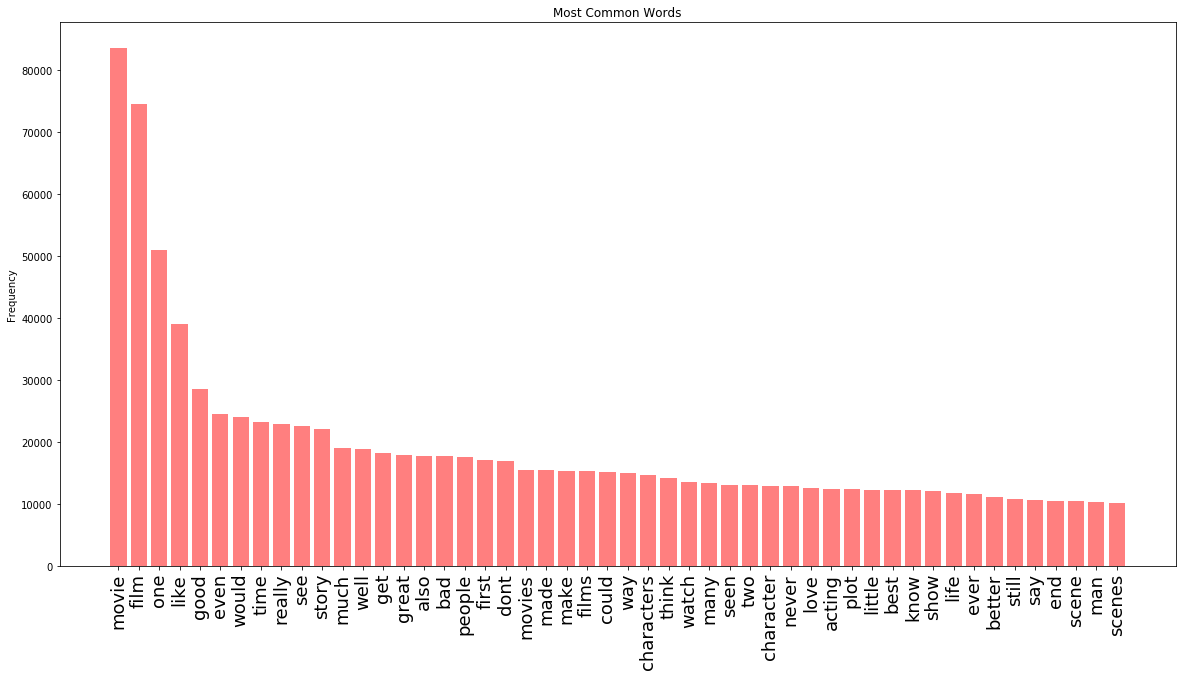

In [143]:
y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Frequency')
plt.title('Most Common Words')

In the above graph, we can observe that terms like movie and film are very common as well as words that have a positive spin on the film. Terms like 'like', 'good', 'well', 'great', adn 'better' are all in the top 50 terms whereas only 'bad' is present for a 'negative term'. 

In [144]:
from gensim.models import word2vec
from gensim.models import Word2Vec


In [147]:
review[2][0]

'brilliant'

With that taken care of, we can observe how accurately we're able to predict and understand similar words to ones common in film. 

In [148]:
word2_mod = Word2Vec(review, size=100, window=5, min_count=1, workers=4)

In [153]:
word2_mod.train(review, total_examples=word2_mod.corpus_count, epochs=10)

(87199649, 115113410)

In [154]:
wv = word2_mod.wv

In [156]:
wv_list = wv.most_similar('movie')
wv_list

[('film', 0.9349132180213928),
 ('moviebr', 0.7702459096908569),
 ('flick', 0.7511550188064575),
 ('filmbr', 0.7002162337303162),
 ('filmit', 0.6979941129684448),
 ('movieit', 0.683742344379425),
 ('it', 0.6693394184112549),
 ('documentary', 0.6390275359153748),
 ('show', 0.6295328140258789),
 ('movieand', 0.6170936226844788)]

In [157]:
wv_list[0][0]

'film'

Text(0.5, 1.0, 'Most Common Words')

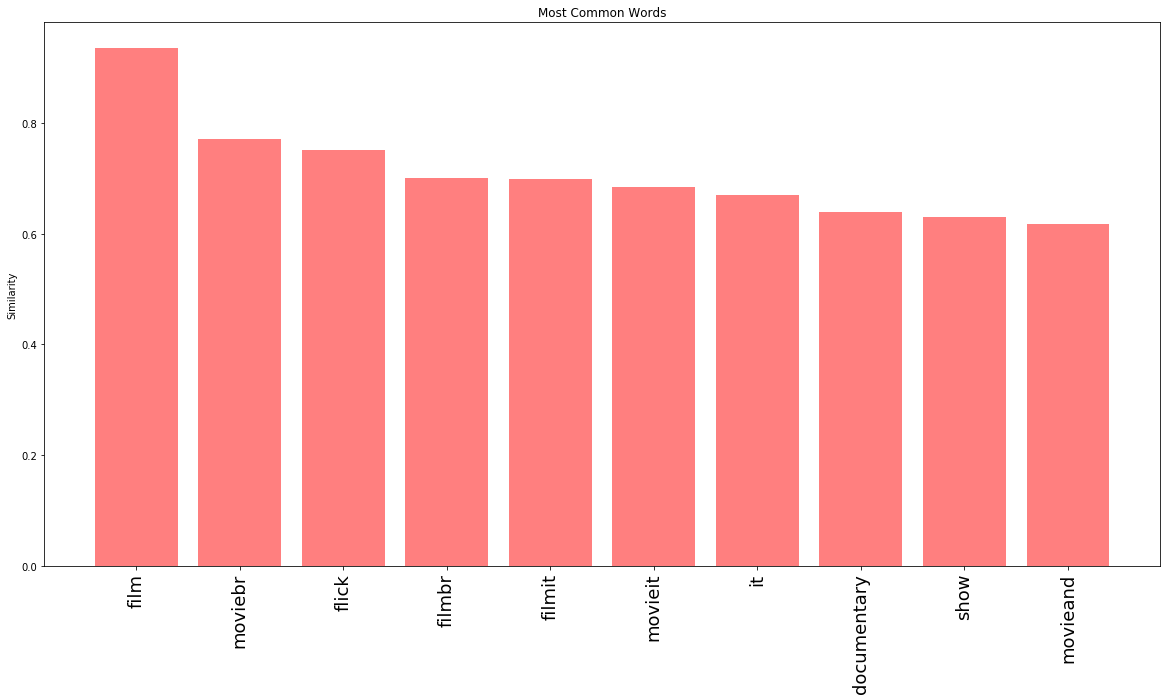

In [158]:
word_list = []
qty_list = []
for i in range(0, len(wv_list)):
    word_list.append(wv_list[i][0])
    qty_list.append(wv_list[i][1])

y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Similarity')
plt.title('Most Common Words')

Almost all words similar to films are either typos of some variation of film or a different word for film like, movie, flick or picture. 

In [159]:
wv_list = wv.most_similar('editing')
wv_list

[('camerawork', 0.7713401913642883),
 ('pacing', 0.7668999433517456),
 ('lighting', 0.7660887837409973),
 ('cinematography', 0.7195342183113098),
 ('direction', 0.7195173501968384),
 ('directing', 0.7142985463142395),
 ('shaky', 0.6696984767913818),
 ('framing', 0.6654821634292603),
 ('scripting', 0.6610367298126221),
 ('audio', 0.6594802737236023)]

In [160]:
wv_list[0][0]

'camerawork'

Text(0.5, 1.0, 'Most Common Words')

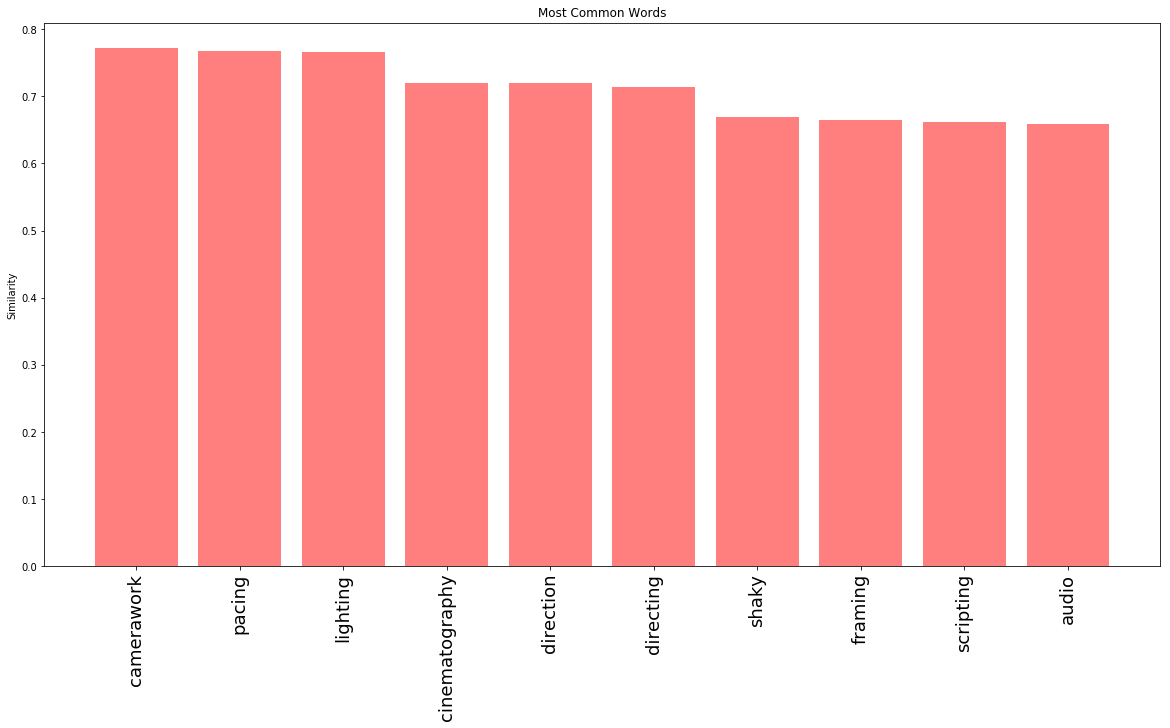

In [161]:
word_list = []
qty_list = []
for i in range(0, len(wv_list)):
    word_list.append(wv_list[i][0])
    qty_list.append(wv_list[i][1])

y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Similarity')
plt.title('Most Common Words')

Examining a technical word like editing brings up similar technical issues people liked to discuss within the film like lighting, camerawork, pacing, and cinematography as well as characterizations of how the film was recorded or edited such as shaky or choppy. 

In [162]:
wv_list = wv.most_similar('story')
wv_list

[('storyline', 0.8294728398323059),
 ('plot', 0.8052809238433838),
 ('tale', 0.7055956125259399),
 ('narrative', 0.6864293813705444),
 ('concept', 0.6751409769058228),
 ('storybr', 0.6749937534332275),
 ('premise', 0.6438127756118774),
 ('stories', 0.642119288444519),
 ('script', 0.6309328675270081),
 ('drama', 0.5695381164550781)]

In [163]:
wv_list[0][0]

'storyline'

Text(0.5, 1.0, 'Most Common Words')

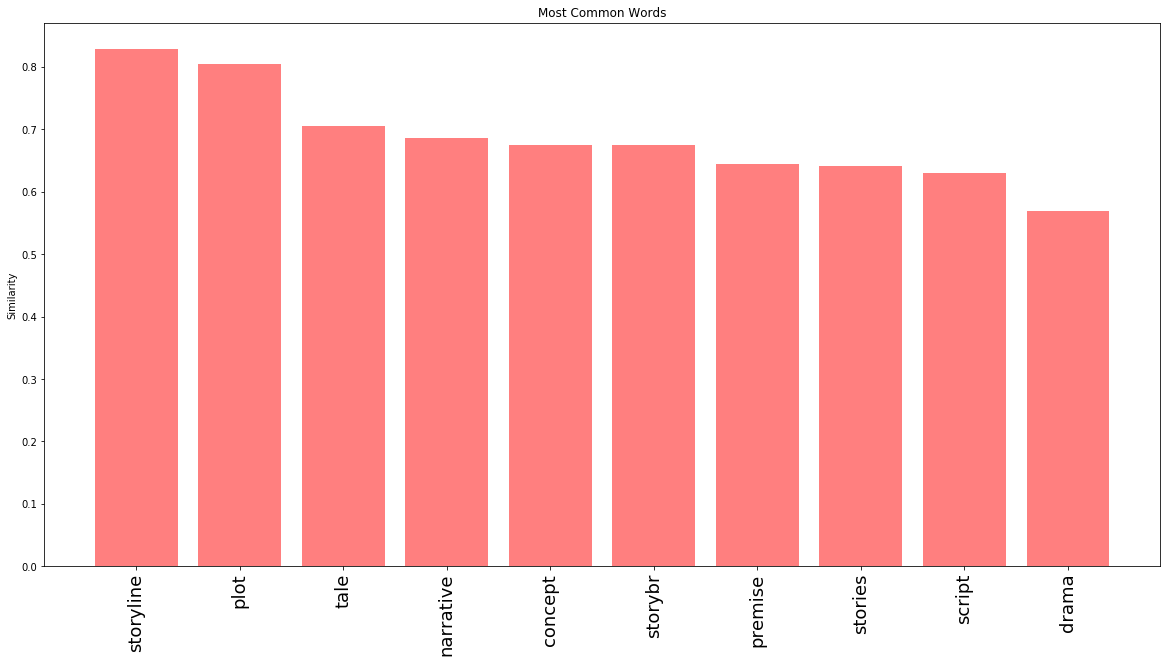

In [164]:
word_list = []
qty_list = []
for i in range(0, len(wv_list)):
    word_list.append(wv_list[i][0])
    qty_list.append(wv_list[i][1])

y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Similarity')
plt.title('Most Common Words')

In [165]:
wv_list = wv.most_similar('acting')
wv_list

[('direction', 0.6805692911148071),
 ('directing', 0.668736457824707),
 ('writing', 0.666034996509552),
 ('actingbr', 0.6629424095153809),
 ('performances', 0.6611748933792114),
 ('cinematography', 0.6511090397834778),
 ('dialogue', 0.6465157270431519),
 ('dialog', 0.6382314562797546),
 ('editing', 0.6361435651779175),
 ('dubbing', 0.6188401579856873)]

In [166]:
wv_list[0][0]

'direction'

Text(0.5, 1.0, 'Most Common Words')

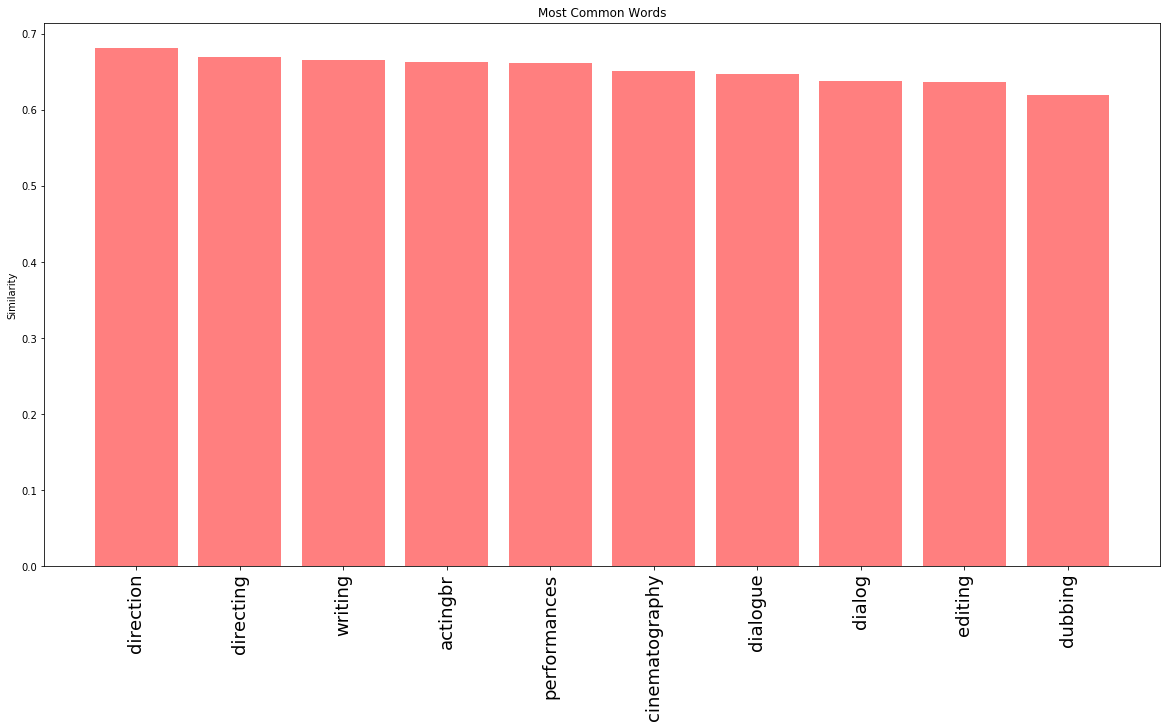

In [167]:
word_list = []
qty_list = []
for i in range(0, len(wv_list)):
    word_list.append(wv_list[i][0])
    qty_list.append(wv_list[i][1])

y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Similarity')
plt.title('Most Common Words')

In [168]:
wv_list = wv.most_similar('performance')
wv_list

[('performancebr', 0.7244521379470825),
 ('performances', 0.6937066316604614),
 ('role', 0.6651344299316406),
 ('portrayal', 0.6103990077972412),
 ('actor', 0.5853068828582764),
 ('characterand', 0.553728461265564),
 ('actorbut', 0.5518258810043335),
 ('performer', 0.5507788062095642),
 ('presence', 0.5475502014160156),
 ('comedienne', 0.5413469672203064)]

In [169]:
wv_list[0][0]

'performancebr'

Text(0.5, 1.0, 'Most Common Words')

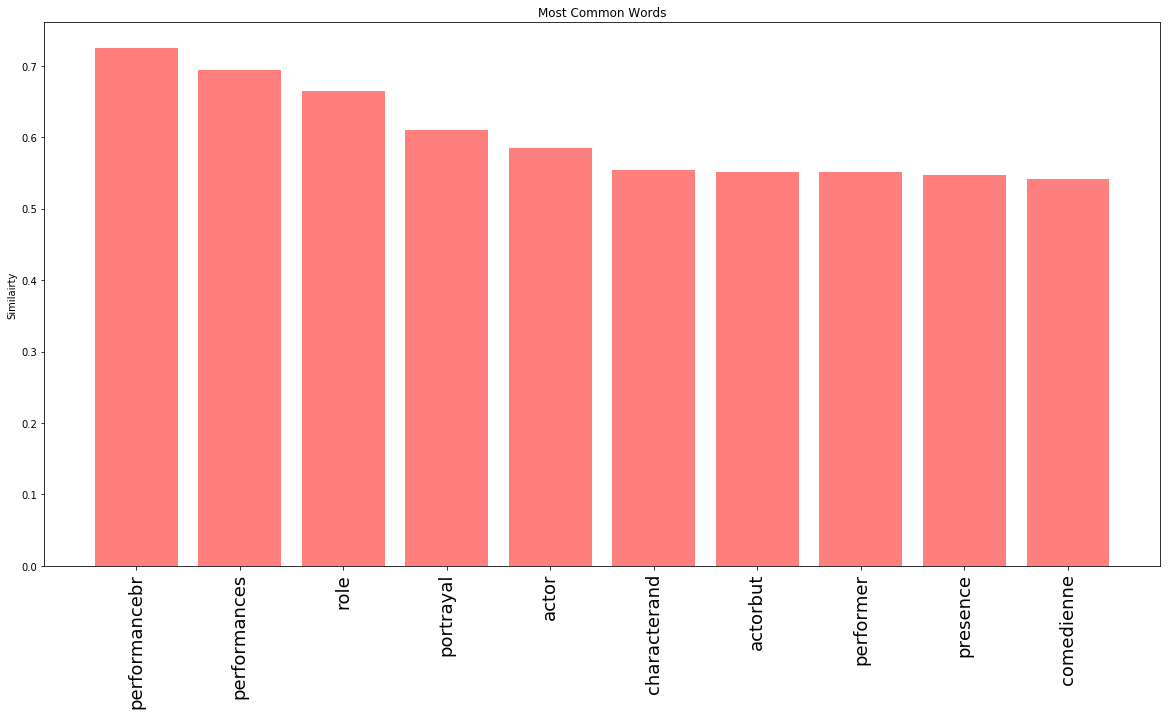

In [170]:
word_list = []
qty_list = []
for i in range(0, len(wv_list)):
    word_list.append(wv_list[i][0])
    qty_list.append(wv_list[i][1])

y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Similairty')
plt.title('Most Common Words')

In [176]:
pos = final_df.loc[final_df.rating==1]

In [177]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
vocab = {}
for i in pos['review']:
    for j in i: 
        if j not in vocab: 
            vocab[j]=1
        else:
            vocab[j]+1

In [178]:
list = []
for i in pos.review:
    for j in i:
        list.append(j)

In [179]:
list = [w for w in list if not w in stop_words]
# filter out short tokens
list = [word for word in list if len(word) > 2]


The line of code above gets rid of all words that are shorter than 3 letters and removes all stopwords from the dataset

In [180]:
vocab = Counter(list)

In [181]:
common = vocab.most_common(50)

In [182]:
word_list = []
qty_list = []
for i in range(0, len(common)):
    word_list.append(common[i][0])
    qty_list.append(common[i][1])
word_list[:20]

['film',
 'movie',
 'one',
 'like',
 'good',
 'great',
 'story',
 'see',
 'time',
 'well',
 'also',
 'really',
 'would',
 'even',
 'much',
 'first',
 'films',
 'love',
 'people',
 'best']

Text(0.5, 1.0, 'Most Common Words In Positive films')

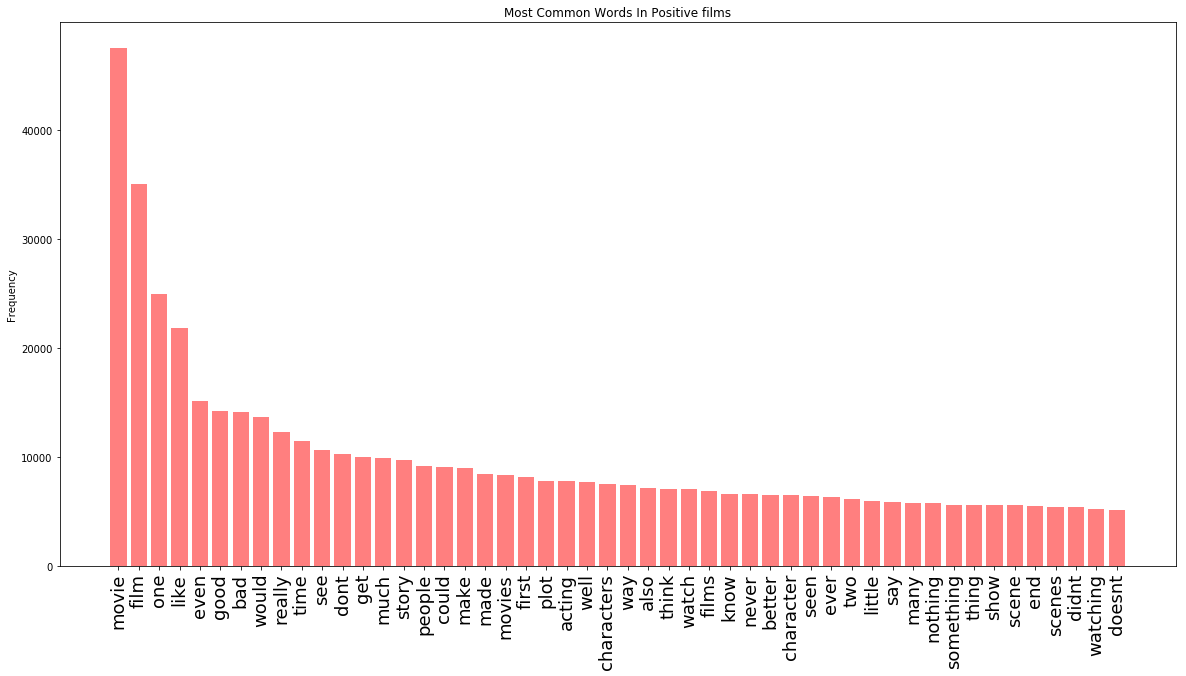

In [202]:
y_pos = np.arange(len(word_list))
plt.figure(figsize=(20,10))
plt.bar(y_pos, qty_list, align='center', alpha=0.5, color='r')
plt.xticks(fontsize=18, rotation=90)
plt.xticks(y_pos, word_list)
plt.ylabel('Frequency')
plt.title('Most Common Words In Positive films')

Conclusion: Our models performed effectively at figuring out what words reflect a film being good and what words reflect a poor film. We also see how a technical aspect like camerawork, is contextually similar to other technical aspects of film like pacing, editing, cinematography, and set design. 